In [85]:
# Dependencies
import numpy as np
import json
import pandas as pd
import matplotlib.pyplot as plt
import requests
import scipy.stats as st
from scipy.stats import linregress
from sklearn import datasets
from pprint import pprint
from config import crimekey
from config import censuskey
from census import Census
c = Census(censuskey, year=2013)

In [86]:
# Set the file path
edupath = "Resources/cc_institution_details_clean.csv"

# Read the file 
edu = pd.read_csv(edupath,encoding='utf-8')
#crime = pd.read_csv(crimepath)

edu.head()

,unitid,chronname,city,state,level,control,basic,hbcu,flagship,long_x,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,-86.568502,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13.0,386.0,99.7|07,NaN,882.0
1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,-86.809170,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13.0,106.0,56.0|07,UAB,1376.0
2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,-86.174010,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16.0,252.0,100.0|07,NaN,3.0
3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,-86.638420,...,0.0,0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13.0,106.0,43.1|07,UAH,759.0
4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,-86.295677,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13.0,386.0,88.0|07,ASU,1351.0


In [87]:
edu_df = edu[["state","level","basic","level","student_count"]]
edu_df.head()

,state,level,basic,level,student_count
0,Alabama,4-year,Masters Colleges and Universities--larger prog...,4-year,4051
1,Alabama,4-year,Research Universities--very high research acti...,4-year,11502
2,Alabama,4-year,Baccalaureate Colleges--Arts & Sciences,4-year,322
3,Alabama,4-year,Research Universities--very high research acti...,4-year,5696
4,Alabama,4-year,Masters Colleges and Universities--larger prog...,4-year,5356


In [88]:
# open population file by reading this file: census_pd.to_csv("Output/census_raw.csv")
# set the path 
Population_path = "Output/census_raw.csv"

# Read the csv file 
Populationdf = pd.read_csv(Population_path)
Populationdf.head()

,Unnamed: 0,State,Name,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Unemployment Rate
0,0,1,Alabama,4799277.0,38.1,43253.0,23680.0,870631.0,18.140878,5.040968
1,1,2,Alaska,720316.0,33.6,70760.0,32651.0,69514.0,9.650487,4.572854
2,2,4,Arizona,6479703.0,36.3,49774.0,25358.0,1131901.0,17.468409,4.882323
3,3,5,Arkansas,2933369.0,37.5,40768.0,22170.0,547328.0,18.658682,4.132961
4,4,6,California,37659181.0,35.4,61094.0,29527.0,5885417.0,15.628107,5.758662


In [89]:
# open edu_rate_df by reading csv file : edu_rate_df.to_csv("Output/edu_rate_df.csv", index=False, header=True)
# set the path 
Edu_rate_path = "Output/edu_rate_df.csv"

# Read the csv file 
edu_rate_df = pd.read_csv(Edu_rate_path)
edu_rate_df = edu_rate_df.rename(columns = {"% graduate":"graduate ratio (%)"})
edu_rate_df.head()

,state,number of graduates,Population,graduate ratio (%)
0,Alabama,4051,4799277.0,0.084409
1,Alabama,11502,4799277.0,0.239661
2,Alabama,322,4799277.0,0.006709
3,Alabama,5696,4799277.0,0.118685
4,Alabama,5356,4799277.0,0.111600


In [90]:
# double check edu df type
edu_rate_df.dtypes

state                   object
number of graduates      int64
Population             float64
graduate ratio (%)     float64
dtype: object

In [91]:
#open statemerge by reading csv file: statemerge.to_csv("Output/statemerge.csv", index=False, header=True)

# set the path 
statemerge_path = "Output/statemerge.csv"

# Read the csv file 
statemerge_df = pd.read_csv(statemerge_path)
statemerge_df.head()

,Actuals,state
0,1208,Alabama
1,4742,Alaska
2,1069,Arkansas
3,3379,Arizona
4,9734,California


In [92]:
# groupby edu file by state in order to have common and equal state column to merge later
edu_rate = edu_rate_df.groupby("state")["number of graduates","Population","graduate ratio (%)"].mean()
#edu_rate = edu_rate_df.mean()
edu_rate = edu_rate.dropna()
edu_rate.head()

/var/folders/yn/xk1nllmx5_j6zx9bwj6p24kw0000gn/T/ipykernel_5353/3263463534.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  edu_rate = edu_rate_df.groupby("state")["number of graduates","Population","graduate ratio (%)"].mean()


,number of graduates,Population,graduate ratio (%)
state,,,
Alabama,3801.089552,4799277.0,0.079201
Alaska,4331.428571,720316.0,0.601323
Arizona,8881.229508,6479703.0,0.137062
Arkansas,3167.291667,2933369.0,0.107975
California,6778.982405,37659181.0,0.018001


In [93]:
# merge two df together to get master_plot_df
master_plot_df = pd.merge(statemerge_df, edu_rate, on = "state", how = "outer")
master_plot_df["graduate ratio (%)"]=master_plot_df["graduate ratio (%)"]*1000
master_plot_df.head()

,Actuals,state,number of graduates,Population,graduate ratio (%)
0,1208,Alabama,3801.089552,4799277.0,79.201295
1,4742,Alaska,4331.428571,720316.0,601.323387
2,1069,Arkansas,3167.291667,2933369.0,107.974539
3,3379,Arizona,8881.229508,6479703.0,137.062293
4,9734,California,6778.982405,37659181.0,18.000876


In [94]:
# get top 5 big states to do plotting | analysis
master = master_plot_df.sort_values("Population",ascending=False)
master.head(11)

,Actuals,state,number of graduates,Population,graduate ratio (%)
4,9734,California,6778.982405,37659181.0,18.000876
43,743,Texas,6584.044335,25639373.0,25.679428
34,1047,New York,4235.406639,19487053.0,21.734465
9,2662,Florida,5542.828571,19091156.0,29.033488
13,489,Illinois,4761.907143,12848554.0,37.061814
38,150,Pennsylvania,2844.658986,12731381.0,22.343680
35,460,Ohio,3324.261111,11549590.0,28.782503
22,433,Michigan,6005.902174,9886095.0,60.751006
10,430,Georgia,3819.817308,9810417.0,38.936340
27,1009,North Carolina,3812.853846,9651380.0,39.505789


In [95]:
# extract above biggest 5 states to a new master_df to do analysis by conditional with .loc
masterdf = master.loc[(master["Population"]>=9651300)]
masterdf.head(10)

,Actuals,state,number of graduates,Population,graduate ratio (%)
4,9734,California,6778.982405,37659181.0,18.000876
43,743,Texas,6584.044335,25639373.0,25.679428
34,1047,New York,4235.406639,19487053.0,21.734465
9,2662,Florida,5542.828571,19091156.0,29.033488
13,489,Illinois,4761.907143,12848554.0,37.061814
38,150,Pennsylvania,2844.658986,12731381.0,22.343680
35,460,Ohio,3324.261111,11549590.0,28.782503
22,433,Michigan,6005.902174,9886095.0,60.751006
10,430,Georgia,3819.817308,9810417.0,38.936340
27,1009,North Carolina,3812.853846,9651380.0,39.505789


In [96]:
# PLOTTING JOBS 

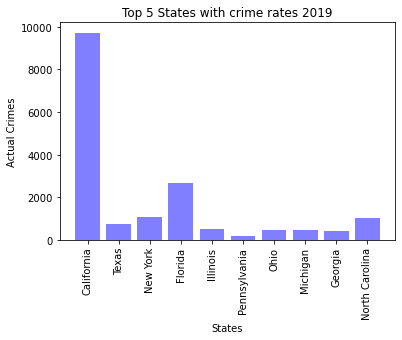

<Figure size 720x14400 with 0 Axes>

In [97]:
# use the masterdf df to implement bar chart to show the crime rates of all states in the US

#define the x and y axis by create a state_list and actuals_list from those columns
x_states = masterdf["state"]
y_crime = masterdf["Actuals"]

plt.bar(x_states, y_crime, color='blue', alpha=0.5, align="center")
plt.xticks(rotation="vertical")
plt.title("Top 5 States with crime rates 2019")
plt.xlabel("States")
plt.ylabel("Actual Crimes")
plt.figure(figsize=(10,200))
plt.savefig("Output/Crime_per_state.png")
plt.show()

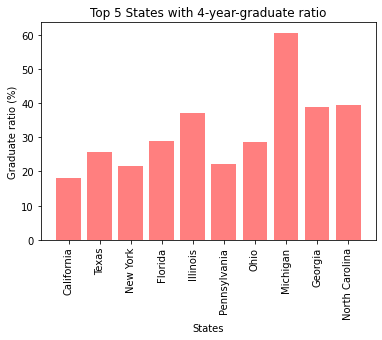

<Figure size 720x14400 with 0 Axes>

In [98]:
# same df to show the 4-year-academic-graduate ratio from Top 5 states
x_states = masterdf["state"]
y_graduate = masterdf["graduate ratio (%)"]
plt.bar(x_states, y_graduate, color='r', alpha=0.5, align="center")
plt.xticks(rotation="vertical")
plt.title("Top 5 States with 4-year-graduate ratio")
plt.xlabel("States")
plt.ylabel("Graduate ratio (%)")
plt.figure(figsize=(10,200))
plt.savefig("Output/Education_states.png")
plt.show()

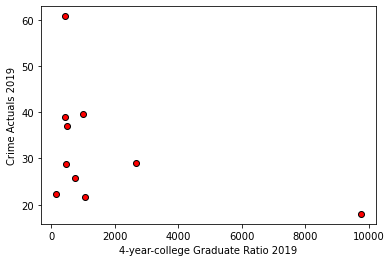

In [99]:
# find the correlation bt. education (College graduation rate per population) and crime rate
# do scatter plot first

plt.scatter(masterdf.iloc[:,0],masterdf.iloc[:,4],marker="o", facecolors="red", edgecolors="black")
plt.xlabel('4-year-college Graduate Ratio 2019')
plt.ylabel('Crime Actuals 2019')
plt.savefig("Output/Crime_Education_scatter.png")
plt.show()

In [100]:
# correlation | for every change of the y | the higher the number, the closer the relationship | must be -1 < correlation < 1 (from 0.5 is good relationship)
# y = 2x | y = -0.65x 
Graduation = masterdf.iloc[:,4]
Crime = masterdf.iloc[:,0]
correlation = st.pearsonr(Graduation,Crime)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is -0.43


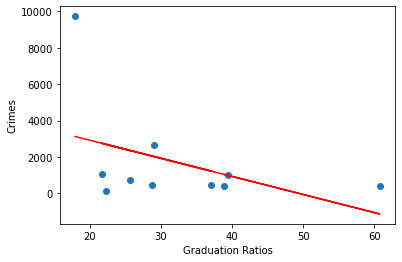

In [101]:
# Add the linear regression equation and line to plot
x_values = masterdf["graduate ratio (%)"]
y_values = masterdf["Actuals"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Graduation Ratios")
plt.ylabel("Crimes")
plt.savefig("Output/Regression_Crime_Education.png")
plt.show()

In [102]:
# Analysis: pls refer to presentation slides and readme file. 